### Task
1. Perform exploratory analysis and extract insights from the dataset.
2. Split the dataset into train/test sets and explain your reasoning.
3. Build a predictive model to predict which customers are going to churn and discuss the reason why you choose a particular algorithm.
4. Establish metrics to evaluate model performance.
5. Discuss the potential issues with deploying the model into production.

#### Exploratory Analysis and Extract Insights

In [1]:
import pandas as pd
import numpy as np
# set random seed to have reproducible results
# sklearn uses numpy random seed
np.random.seed(42)

In [3]:
df = pd.read_csv("./data/Data_Science_Challenge.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Check fundamentals - data types, null count, column names, etc.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

We have a clean DataFrame without any null. Let's see if every row is unique to one customer (with a phone number).

In [5]:
df["phone number"].nunique()

3333

let's create our final dataset by concatenating categorical and numerical features.

Other features such as area code (as long as their distinct value amount does not explode the number of variables in the dataset) can be processed with one-hot encoding to create insight for machine learning models.

In [6]:
area_code_dummies = pd.get_dummies(df["area code"])
area_code_dummies = area_code_dummies.add_prefix('area_code_')
area_code_dummies

,area_code_408,area_code_415,area_code_510
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
3328,0,1,0
3329,0,1,0
3330,0,0,1
3331,0,0,1


In [7]:
df["voice mail plan"].loc[df["voice mail plan"] == "no"] = 0
df["voice mail plan"].loc[df["voice mail plan"] == "yes"] = 1
df["voice mail plan"] = df["voice mail plan"].astype("int64")
df["voice mail plan"]

/var/folders/ph/hf46cbxx0bj_5t8gb0d0zsv00000gp/T/ipykernel_33054/515059750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["voice mail plan"].loc[df["voice mail plan"] == "no"] = 0
/var/folders/ph/hf46cbxx0bj_5t8gb0d0zsv00000gp/T/ipykernel_33054/515059750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["voice mail plan"].loc[df["voice mail plan"] == "yes"] = 1


0       1
1       1
2       0
3       0
4       0
       ..
3328    1
3329    0
3330    0
3331    0
3332    1
Name: voice mail plan, Length: 3333, dtype: int64

In [8]:
df["international plan"].loc[df["international plan"] == "no"] = 0
df["international plan"].loc[df["international plan"] == "yes"] = 1
df["international plan"] = df["international plan"].astype("int64")
df["international plan"]

/var/folders/ph/hf46cbxx0bj_5t8gb0d0zsv00000gp/T/ipykernel_33054/3868202912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["international plan"].loc[df["international plan"] == "no"] = 0
/var/folders/ph/hf46cbxx0bj_5t8gb0d0zsv00000gp/T/ipykernel_33054/3868202912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["international plan"].loc[df["international plan"] == "yes"] = 1


0       0
1       0
2       0
3       1
4       1
       ..
3328    0
3329    0
3330    0
3331    1
3332    0
Name: international plan, Length: 3333, dtype: int64

We can form our final dataset by combining categorical features into numerical features.

In [9]:
df_final = df.drop(columns=["phone number", "state", "area code"])
df_final = pd.concat([df_final,area_code_dummies], axis=1)
df_final

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area_code_408,area_code_415,area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,False,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,False,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,False,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,False,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,...,83,12.56,9.9,6,2.67,2,False,0,1,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,...,123,8.61,9.6,4,2.59,3,False,0,1,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,...,91,8.64,14.1,6,3.81,2,False,0,0,1
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,...,137,6.26,5.0,10,1.35,2,False,0,0,1


Now, will check the distribution of values to gain a deeper understanding of the dataset

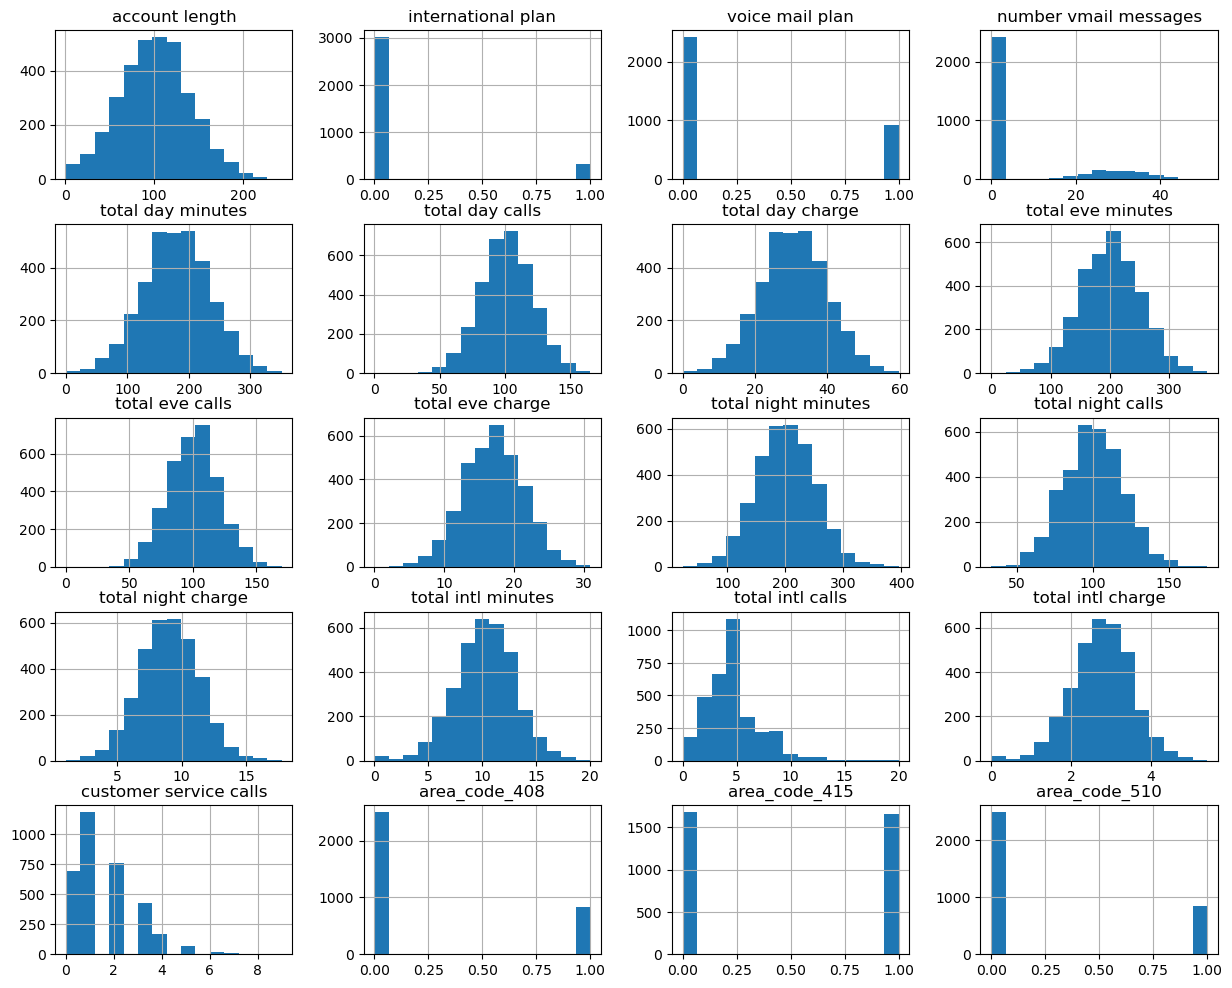

In [10]:
import matplotlib.pyplot as plt

df_final.hist(figsize=(15,12),bins = 15)
plt.show()

In [11]:
df_final.groupby(['churn'])['churn'].count()

churn
False    2850
True      483
Name: churn, dtype: int64

The distributions tell us:

1. Most customers don't use voice mail service and international plans.
2. Half of the customers live in area code 415.
3. The company earns more by total day calls (check total day charge).
4. We have an imbalanced dataset which could be tricky when choosing evaluation metrics.  

Let's extract some insights into the relationship between features. First, observe the correlation.

<AxesSubplot: >

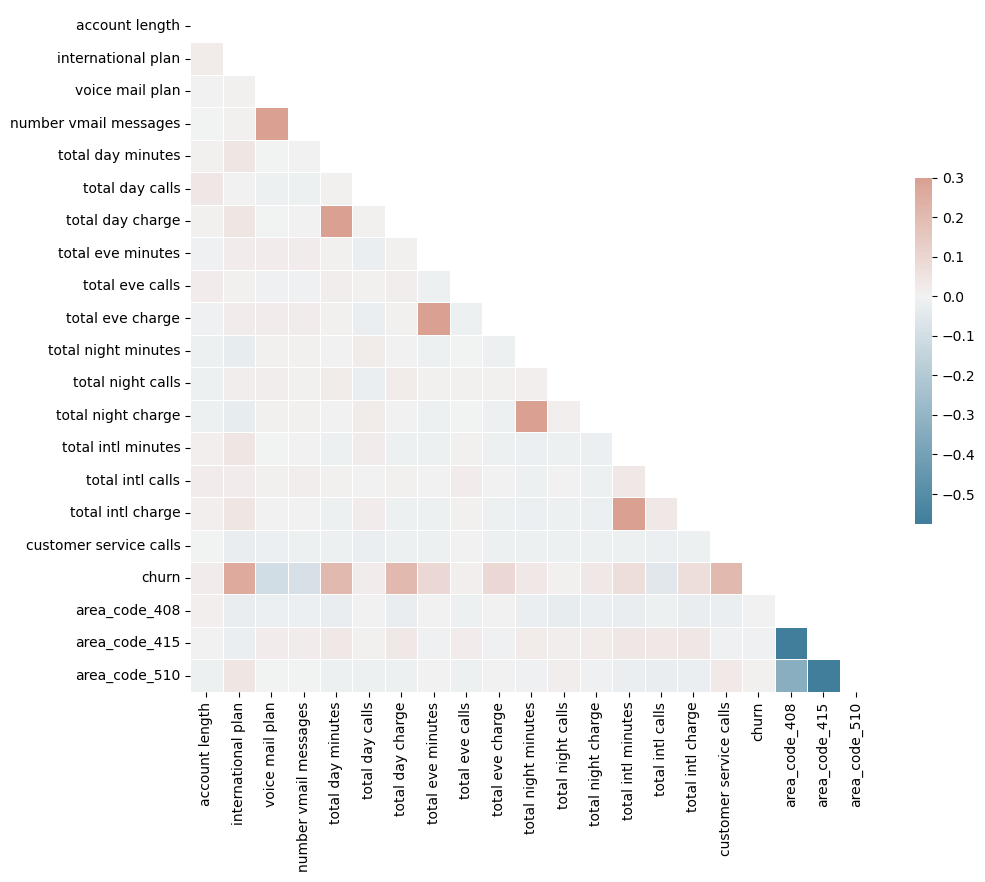

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# it could take some time to run this cell since we are calculating correlation matrix in a dimesion of (100x100)
# to have a better visualization, we will take only one triangle 
# because other trangle is only its symmetry (i.e a x b and b x a)

# Generate a mask for the upper triangle
corr = df_final.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the correlation matrix, we observe the following things:

There is a positive correlation between:
* total day charge, total day minutes, and churn
* total eve minutes and total eve charge
* total night minutes and total night charge
* total intl minutes and total intl charge
* total customer service calls and churn
* number vmail messages and voice mail
* international plan and churn

There is a negative correlation between:
* churn and voice mail plan
* churn and number vmail messages
* churn and total intl calls

Most of the relations are as expected.  
Still, there could be some interesting points such as the positive correlation between churn and international plan.  
It could be caused by the poor quality of international plans or calls.  
Let's check the individual effect of features on churn rate through a random forest classifier.

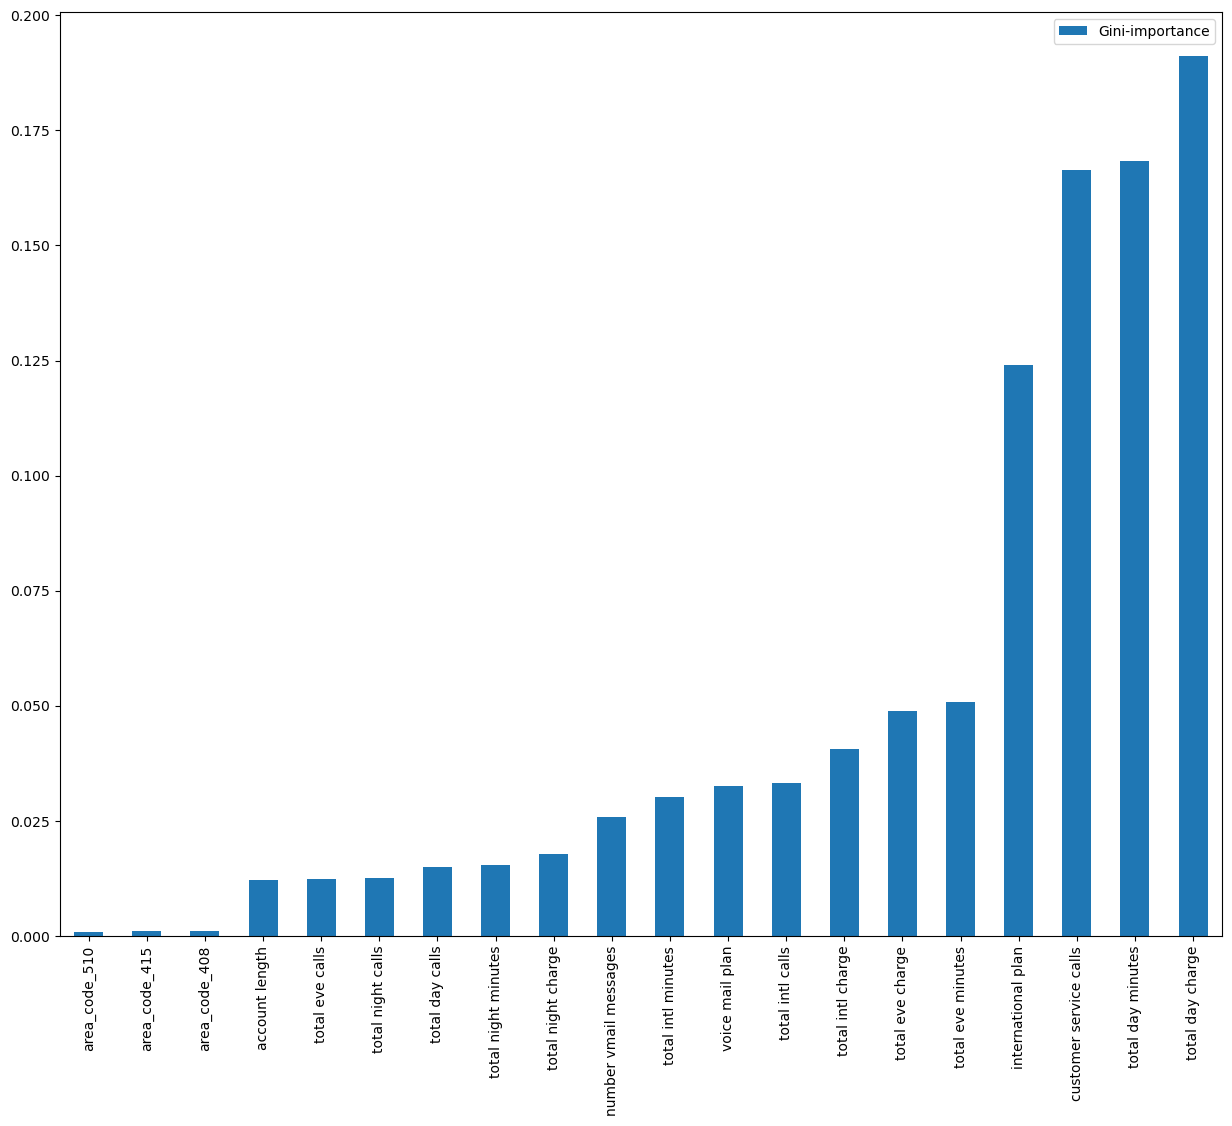

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

le = preprocessing.LabelEncoder()
# apply label encoder for churn since its values are also categories
y = le.fit_transform(df_final["churn"])

# drop label column
X = df_final.drop(columns=["churn"])

# train-test split
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# selected features are selected in multicollinearity check part
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest =  RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df_final.drop(columns=["churn"]).columns, forest.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15,12))
plt.show()

Gini-importance shows us which features would be most useful if we build a tree-based model with given features.  
According to analysis above, the most important three features over churn are: 
* total day charge
* total day minutes
* customer service calls.

#### Train/Test Split

we will mostly apply machine learning methods for the given problem.  
Therefore, we will prefer to use an 80%-20% split since it is used as the most common ratio in applications (not including Deep Learning).  
Furthermore, we have an imbalanced dataset in terms of class distributions.  
We can use stratify option of train_test_split() function of sklearn to split data to train and test datasets with the same distribution and be sure that samples of the test or train dataset are not only formed by the majority class.

#### Predictive Model

this is a classification problem by definition, we will apply a bunch of classifiers and decide to pick one to use in production based on the performance.  
Hyperparameters of the given classifiers are chosen as trial-error without applying an advanced hyperparameter tuning mechanism.

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost",
    "LightGBM"
]

classifiers = [

    KNeighborsClassifier(3), 
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', seed=0),
    LGBMClassifier(random_state=42),
]


/Users/bryancoronelnew/opt/anaconda3/envs/stratascratch/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


#### Metrics
This is a classification task, and the most commonly used metric is accuracy.  
But, we have an imbalanced dataset, which means we need to be careful about our evaluations.   
Let's say you have a very skewed dataset with a distribution of 99% of labels 1 and 1% of them 0. Then, if your model always predicts 1, it will have 99% accuracy but still not a good model.  
F1 score balances the precision and recall so we can have a good metric even for imbalanced datasets.  
Hence, we will use accuracy and F1 scores while comparing the performance of different algorithms.

In [15]:
from sklearn.metrics import f1_score

#### Model Results